## Multiple Linear Regression ##
- Multiple Linear Regression means having atleast **more than ONE Independent/Input features**


***Data***
- index_price = The index price is a single numerical value that represents the overall price level or performance of a basket of assets.
- To calculate index_price we need 'interest_rate' and 'unemployment_rate'
- In our model we want to take the following two input features -
    - interest_rate
    - unemployment_rate
- and be able to predit the 'index_price'

***Cross Validation Score***
- Cross-validation score is a way of measuring how well your machine-learning model performs on unseen data — a rehearsal before the real performance.
- The cross-validation score is the average performance of a model across multiple train-test splits, created using a technique called k-fold cross validation.

**How Cross Validation Score works**
- Split your dataset into k folds (e.g., k = 5)
- For each fold:
    - train on k−1 folds
    - test on the remaining fold
- Repeat for all folds
- Compute the average of all k test scores → this is the CV score
- This gives a more reliable estimate than a single train-test split.


### Steps to Implement Multliple Linear Regression - Gradient Descent ###
- **Step 1) - Feature Engineering / EDA**
- **Step 2) - Find the relationship between the features (input and output features)** 
- **Step 3) - Seperate out the Independent and dependent variables** 
- **Step 4) - Split the data into training and testing sets** 
- **Step 5) - Standardize the data** 
- **Step 6) - Apply Machine Learning Algorithm - Multiple Linear Regression**
- **Step 7) -  Make Predictions for Test data** 
- **Step 8) - Find out errors using MSE, MAE, RMSE** 
- **Step 9) - Calculate the Performance Metrics - (1)R2 and (2)Adjusted R2**
- **Step 10) - Validation - Is the model performing well or not ?** 
    - Validation #1 - Scatter Plot - Actual vs Predicted should be linear** 
    -  Validation #2 - Is the displot like a normal distribution (bell curve)?
    - Validation #3 - Scatter Plot of Residuals vs Predicted Values
    - Validation #4 - Cross-Val Score

### Steps to Implement Multliple Linear Regression - OLS (Ordinary Least Squares) ###
- **Step 1) - Apply Machine Learning Algorithm -  Multiple Linear Regression using the OLS model**
- **Step 2) - Calculate the Best Fit Line using Seaborn's regplot - This calculates using OLS method.**

***Postitive corelation***
- Two variables have positive corelation if they move in the same direction 
    - when one increases --> the other increases
    - when one decreases --> the other decreases

***Negative corelation***
- Two variables have negative corelation if they move in the opposite direction 
    - when one increases --> the other decreases
    - when one decreases --> the other increases

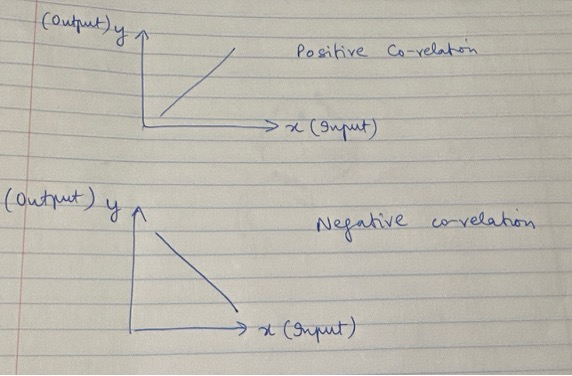

In [68]:
from IPython.display import Image
Image(filename='resources/positive_and_negative_corelation.jpg',height=500,width=800)


***1) Multiple Linear Regression using Gradient Descent***

In [19]:
import pandas as pd
import matplotlib.pyplot as plt # For visualization
import numpy as np

#Display visuzaliation graphs inline (not in a seperate window)
%matplotlib inline

# Read the dataset
df=pd.read_csv('./resources/economic_index.csv')

df.head()  #Display first 5 rows of the dataframe

,#,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
# ----------- Step 1 - Feature Engineering / EDA----------------
# Drop the unnecessary columns - #, year, month
# Output dataframe will have only interest_rate, unemployment_rate, index_price columns
df.drop(columns=['#','year','month'],axis=1, inplace=True)
print(df.head())

   interest_rate  unemployment_rate  index_price
0           2.75                5.3         1464
1           2.50                5.3         1394
2           2.50                5.3         1357
3           2.50                5.3         1293
4           2.50                5.4         1256


In [ ]:
# Check for Null values
# Output observation
# - If output is 0 for all columns, then there are no missing value
print(df.isnull().sum())

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64


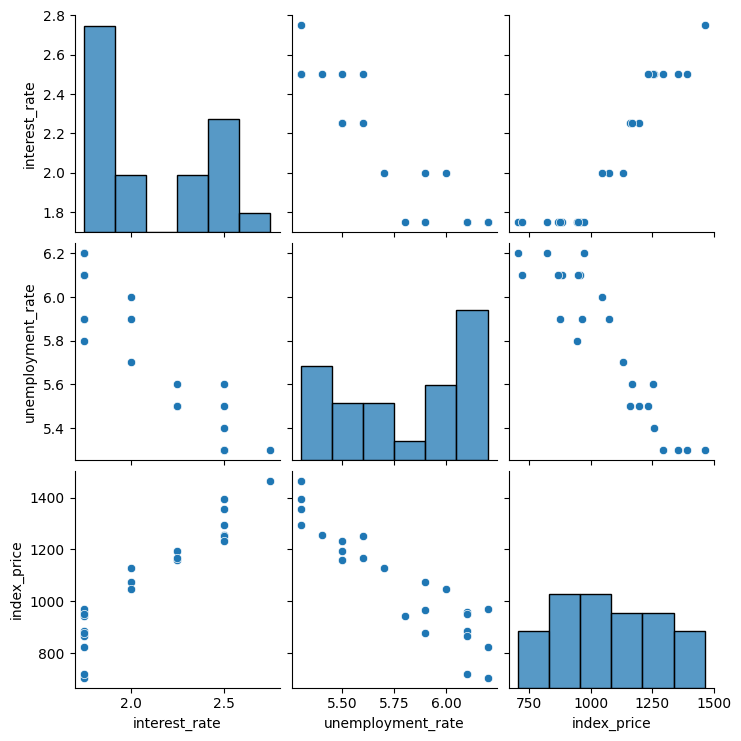

In [ ]:
# ------------- Step 2 - Find the relationship between the features (input and output features) -------------
# Visualize the data
# Output observation
# - Linear Relationship
#    - index_price and interest_rate

# - Inverse Linear Relationship
#    - index_price and unemployment_rate
#    - interest_rate and unemployment_rate
import seaborn as sns
sns.pairplot(df)
plt.show()

In [26]:
# Find the corelation
# Output observation
# - Strong positive corelation between index_price and interest_rate - Linear relationship
# - Strong negative corelation between interest_rate and unemployment_rate - Inverse Linear relationship
# - Strong negative corelation between index_price and unemployment_rate - Inverse Linear relationship

df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


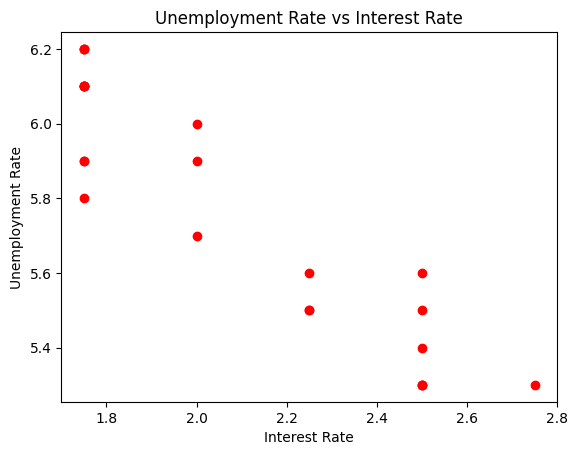

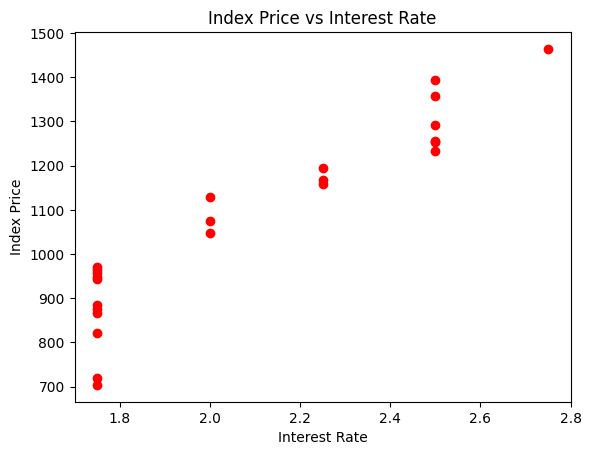

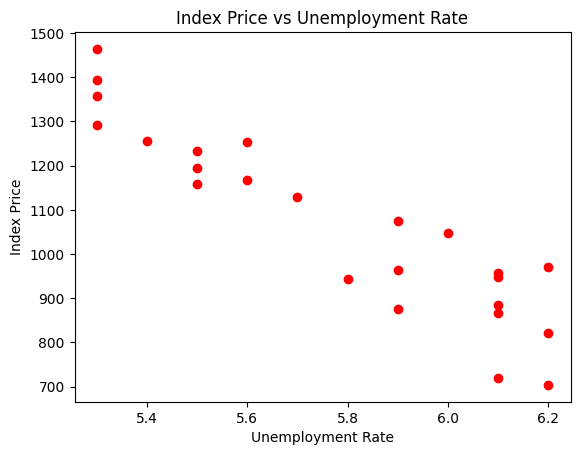

In [31]:
# Visualize the data - continued
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='red')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate vs Interest Rate')
plt.show()

plt.scatter(df['interest_rate'], df['index_price'], color='red')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.title('Index Price vs Interest Rate')
plt.show()

plt.scatter(df['unemployment_rate'], df['index_price'], color='red')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.title('Index Price vs Unemployment Rate')
plt.show()

In [ ]:
# ------------- Step 3 - Seperate out the Independent and dependent variables -------------
# Seperate out the Independent and dependent variables
X = df[['interest_rate', 'unemployment_rate']]  # Independent variables
y = df['index_price']  # Dependent variable 

print ('Input / Independent Variables:', X.head())
print ('Output / Dependent Variable:', y.head())  #Display first 5 rows of the dependent variable dataframe

Input / Independent Variables:    interest_rate  unemployment_rate
0           2.75                5.3
1           2.50                5.3
2           2.50                5.3
3           2.50                5.3
4           2.50                5.4
Output / Dependent Variable: 0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64


In [ ]:
# ------------- Step 4 - Split the data into training and testing sets -------------
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)   
# print('X_train shape:', X_train.shape)
# print('X_test shape:', X_test.shape)
# print('y_train shape:', y_train.shape)
# print('y_test shape:', y_test.shape)    



In [ ]:
# --------------- Step 5 - Standardize the data ----------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Now X_train and X_test are standardized and have mean=0 and stddev=1
# Build the Multiple Linear Regression Model

print('X_train = ', X_train)
print('X_test = ', X_test)

X_train =  [[-0.90115511  0.37908503]
 [ 1.31077107 -1.48187786]
 [-0.90115511  1.30956648]
 [ 1.31077107 -0.55139641]
 [ 1.31077107 -1.48187786]
 [-0.16384638  0.68924552]
 [-0.90115511  0.999406  ]
 [ 1.31077107 -1.48187786]
 [ 1.31077107 -1.17171738]
 [-0.90115511  1.30956648]
 [-0.90115511  0.999406  ]
 [-0.90115511  0.37908503]
 [-0.90115511  0.999406  ]
 [ 0.57346234 -0.8615569 ]
 [-0.16384638 -0.24123593]
 [-0.90115511  0.06892455]
 [-0.90115511  0.999406  ]
 [ 1.31077107 -0.8615569 ]]
X_test =  [[ 0.57346234 -0.8615569 ]
 [-0.90115511  1.30956648]
 [ 2.0480798  -1.48187786]
 [-0.90115511  0.999406  ]
 [-0.16384638  0.37908503]
 [ 0.57346234 -0.55139641]]


In [ ]:
# -------------------- Step 6 - Apply Machine Learning Algorithm - Multiple Linear Regression ----------------
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)     

# Print the model coefficients
# Coefficients output observation
# - Coefficient for interest_rate: '88.27'
# - Coefficient for unemployment_rate: '-116.25'

# Output Observation > Coefficients/Slope
# - For every 1 unit increase in interest_rate, index_price increases by '88.27' units, assuming unemployment_rate remains constant.
# - For every 1 unit increase in unemployment_rate, index_price decreases by '116.25' units, assuming interest_rate remains constant.  
print('Coefficients/Slope:', linearRegression.coef_)

# Intercept
print('Intercept:', linearRegression.intercept_)

  

Coefficients/Slope: [  88.27275507 -116.25716066]
Intercept: 1053.4444444444443


In [ ]:
# ------------- Step 7 -  Make Predictions for Test data ------------
# Make predictions on the test set
y_pred = linearRegression.predict(X_test)
# Print the predicted values
print('Predicted values:', y_pred)

Predicted values: [1204.22770398  821.65051903 1406.51300368  857.70889608  994.90992298
 1168.16932693]


In [ ]:
# --------------- Step 8 - Find out errors using MSE, MAE, RMSE -----------------
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# Caluclate the different error metrics - MAE, MSE, RMSE
# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE) = ',mae)

# Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) = ',mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE) = ',rmse)

Mean Absolute Error (MAE) =  59.9357815232356
Mean Squared Error (MSE) =  5793.762887712589
Root Mean Squared Error (RMSE) =  76.11677139574819


In [ ]:
# ------------- Step 9 - Calculate the Performance Metrics - (1)R2 and (2)Adjusted R2 -------------
# R2 score = 0.73 ~ 73% accuracy
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R squared performance = ", r2)

# Adjusted R squared  = 0.67 ~ 67% accuracy  
# Adjusted R² = 1 - (1-R²)(n-1)/(n-p-1)
# Where,
# R² = R squared
# n = number of observations (data points)
# p = number of independent variables (features)
# Output Observation
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R squared performance = ", adjusted_r2)   

# Output Observations:
# 'Adjusted R squared' is slightly lower than 'R squared', which is expected.


R squared performance =  0.827897809145714
Adjusted R squared performance =  0.7131630152428566


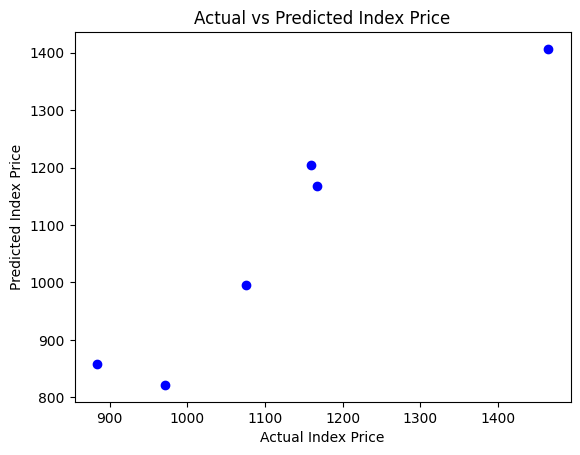

In [ ]:
# ----------------- Step 10 - Validation - Is the model performing well or not ? -----------------

# Validation #1 - Scatter Plot - Actual vs Predicted should be linear 
# Output Observation
# - Between y_test and y_pred, if the points are closely clustered around a straight line (linear relationship), it indicates that the model is performing well.
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Index Price')
plt.ylabel('Predicted Index Price')
plt.title('Actual vs Predicted Index Price')
plt.show()


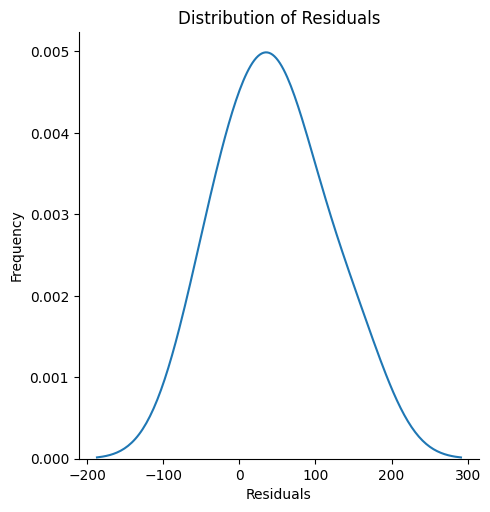

In [ ]:
# Validation #2 - Is the displot like a normal distribution (bell curve)?
# Output Observation 
# - If it is a normal distribution, it indicates that the residuals are randomly distributed, which is a good sign for the model.
residuals = y_test - y_pred
sns.displot(residuals, kind="kde")
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

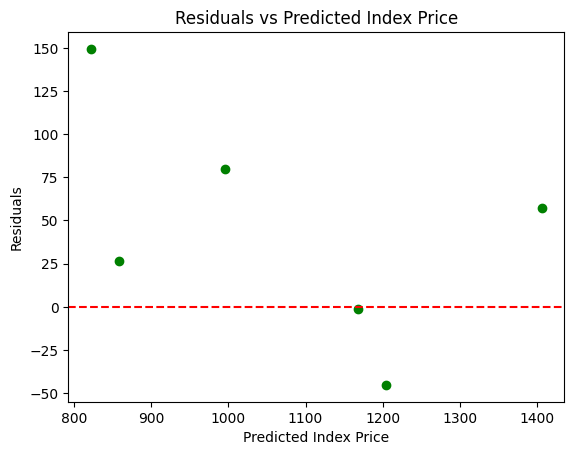

In [ ]:
# Validation #3 - Scatter Plot of Residuals vs Predicted Values
# Output Observation
# - If the residuals are randomly scattered around zero without any discernible pattern, it indicates that the model is appropriate for the data.
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Index Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Index Price')
plt.show()

In [ ]:
# Validation #4 - Cross-Val Score
from sklearn.model_selection import cross_val_score

# cv = 5, means 5-Fold Cross Validation
# scoring = 'neg_mean_squared_error' means we are using Negative Mean Squared Error as the evaluation metric
# We will get 5 different scores for each fold (because cv=5), we will then take the average of these scores to get the final cross-validation score.
# Output Observation
# - Variance is huge = 791 to 9169 
#       - This indicates the the model is not very stable and may not generalize well to unseen data.    
cross_validation_scores = cross_val_score(linearRegression, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print('Cross-Validation Scores:', cross_validation_scores)
print('Average Cross-Validation Score:', np.mean(cross_validation_scores))

Cross-Validation Scores: [-1861.74046551 -8715.8459466  -7707.52362191 -9169.13776461
  -791.32842311]
Average Cross-Validation Score: -5649.11524435076


***2) Multiple Linear Regression using OLS***

In [ ]:
# Multiple Linear Regression using OLS (Ordinary Least Squares) method
# Step 1 - Apply Machine Learning Algorithm -  Multiple Linear Regression using the OLS model
import statsmodels.api as sm    
ols_model = sm.OLS(y_train, X_train).fit()
ols_predictions = ols_model.predict(X_test)
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 30 Nov 2025   Prob (F-statistic):                       0.754
Time:                        21:13:01   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

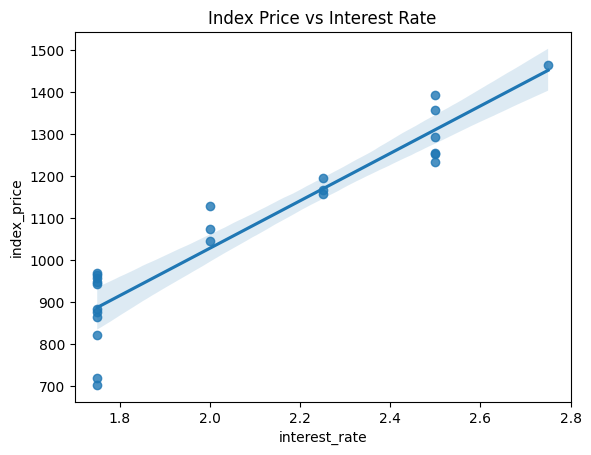

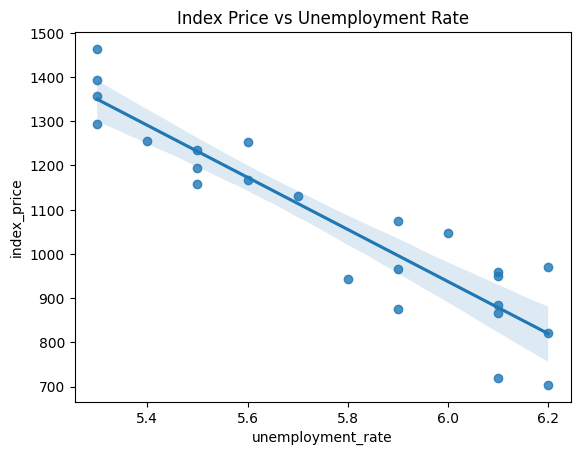

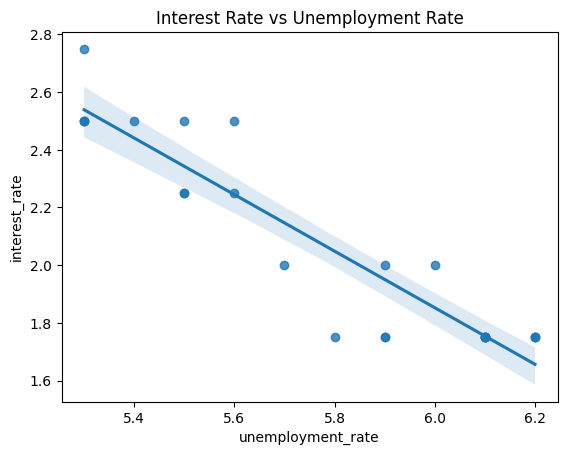

In [ ]:
# --------- Step 2 - Calculate the Best Fit Line using Seaborn's regplot - This calculates using OLS method. --------
# IMPORTANT - This way of creating a Best Fit line is easier than using sklearn's LinearRegression() method as we don't have to fit and predict separately.
# Shaded Region = We can hypothesize with 95% confidence that the true regression line lies within this region

# Linear Regression Line / Best Fit Line - Index Price vs Interest Rate
# Create the Best Fit Line using Seaborn's regplot

sns.regplot(x='interest_rate', y='index_price', data=df)
plt.title('Index Price vs Interest Rate')
plt.show()

# Linear Regression Line / Best Fit Line - Index Price vs Unemployment Rate
sns.regplot(x='unemployment_rate', y='index_price', data=df)
plt.title('Index Price vs Unemployment Rate')
plt.show()

# Linear Regression Line / Best Fit Line - Interest Rate vs Unemployment Rate
sns.regplot(x='unemployment_rate', y='interest_rate', data=df)
plt.title('Interest Rate vs Unemployment Rate')
plt.show()